<a href="https://colab.research.google.com/github/wesleyroseno/colaboratory/blob/main/Curso_NVIDIA_Projeto_no_ecossistema_RAPIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto no ecossistema RAPIDS

## Instalação

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 8.24 MiB/s, done.
Resolving deltas: 100% (191/191), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.3 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.6/499.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cudf
import cupy as cp
print(cudf.__version__)
print(cp.__version__)

23.08.00
12.2.0


# Base de dados do censo

Mais sobre a base de dados: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados

In [ ]:
base_census = cudf.read_csv('/content/census.csv')

#import pandas as pd
#base_census2 = pd.read_csv('/content/census.csv')

In [ ]:
type(base_census)

cudf.core.dataframe.DataFrame

In [ ]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
base_census.describe()

/usr/local/lib/python3.10/dist-packages/cudf/core/dataframe.py:4852: FutureWarning: `datetime_is_numeric` is deprecated. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cudf/core/series.py:3166: FutureWarning: `datetime_is_numeric` is deprecated and will be removed in a future release. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(


,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_census.isnull().sum()

age                0
workclass          0
final-weight       0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loos       0
hour-per-week      0
inative-country    0
income             0
dtype: int64

## Visualização dos dados

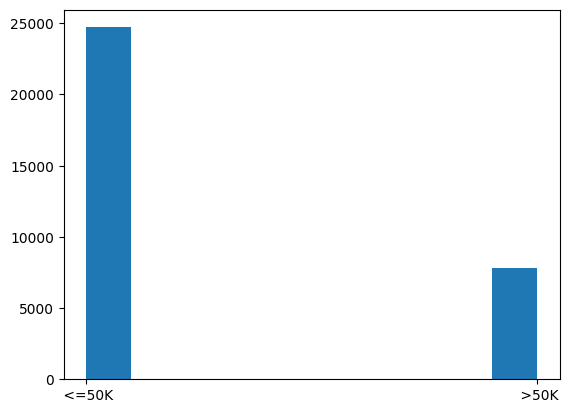

In [ ]:
plt.hist(x = base_census['income']);

## Divisão entre previsores e classe

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'inative-country',
       'income'],
      dtype='object')

In [ ]:
X_census = base_census.iloc[:, 0:14]

In [ ]:
X_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [ ]:
y_census = base_census.iloc[:, 14]

In [ ]:
y_census

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [ ]:
type(X_census), type(y_census)

(cudf.core.dataframe.DataFrame, cudf.core.series.Series)

## Tratamento de atributos categóricos

### LabelEncoder


In [ ]:
from cuml.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
X_census['workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object

In [ ]:
teste = label_encoder_teste.fit_transform(X_census['workclass'])

In [ ]:
teste

0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Length: 32561, dtype: uint8

In [ ]:
X_census['workclass'] = teste

In [ ]:
X_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census['workclass'] = label_encoder_workclass.fit_transform(X_census['workclass'])
X_census['education'] = label_encoder_education.fit_transform(X_census['education'])
X_census['marital-status'] = label_encoder_marital.fit_transform(X_census['marital-status'])
X_census['occupation'] = label_encoder_occupation.fit_transform(X_census['occupation'])
X_census['relationship'] = label_encoder_relationship.fit_transform(X_census['relationship'])
X_census['race'] = label_encoder_race.fit_transform(X_census['race'])
X_census['sex'] = label_encoder_sex.fit_transform(X_census['sex'])
X_census['inative-country'] = label_encoder_country.fit_transform(X_census['inative-country'])

In [ ]:
X_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [ ]:
type(X_census)

cudf.core.dataframe.DataFrame

In [ ]:
X_census = cp.from_dlpack(X_census.to_dlpack())

In [ ]:
X_census

array([[    39,      7,  77516, ...,      0,     40,     39],
       [    50,      6,  83311, ...,      0,     13,     39],
       [    38,      4, 215646, ...,      0,     40,     39],
       ...,
       [    58,      4, 151910, ...,      0,     40,     39],
       [    22,      4, 201490, ...,      0,     20,     39],
       [    52,      5, 287927, ...,      0,     40,     39]])

In [ ]:
type(X_census)

cupy.ndarray

### OneHotEncoder

In [ ]:
# Gol, Pálio
# 0, 4

# 1, 0 -> Gol
# 0, 1 -> Pálio

In [ ]:
from cuml.preprocessing import OneHotEncoder
from cuml.compose import ColumnTransformer

In [ ]:
len(np.unique(base_census['workclass']))

9

In [ ]:
len(np.unique(base_census['occupation']))

15

In [ ]:
onehotencoder_census = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(sparse=False),
                                                          [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census)

In [ ]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
base_census.shape

(32561, 15)

In [ ]:
X_census.shape

(32561, 108)

In [ ]:
type(X_census)

cupy.ndarray

## Escalonamento dos valores

In [ ]:
from cuml.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## Divisão das bases em treinamento e teste

In [ ]:
from cuml.model_selection import train_test_split

In [ ]:
y_census

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [ ]:
y_census = LabelEncoder().fit_transform(y_census)
y_census

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Length: 32561, dtype: uint8

In [ ]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census,
                                                                                              y_census,
                                                                                              test_size = 0.15,
                                                                                              random_state = 42)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27677, 108), (27677,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4884, 108), (4884,))

## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# Regressão logística




In [ ]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27677, 108), (27677,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4884, 108), (4884,))

In [ ]:
type(X_census_treinamento), type(y_census_treinamento), type(X_census_teste), type(y_census_teste)

(cupy.ndarray, cupy.ndarray, cupy.ndarray, cupy.ndarray)

In [ ]:
from cuml.linear_model import LogisticRegression

In [ ]:
logistic_census = LogisticRegression()
logistic_census.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression()

In [ ]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
y_census_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from cuml.metrics import accuracy_score, confusion_matrix
accuracy_score(y_census_teste, previsoes)

0.8480753302574158

In [ ]:
confusion_matrix(y_census_teste, previsoes, convert_dtype=True)

array([[3428,  231],
       [ 511,  714]])

# Aprendizagem baseada em instâncias - KNN

In [ ]:
from cuml.neighbors import KNeighborsClassifier

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors = 10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier()

In [ ]:
type(knn_census)

cuml.neighbors.kneighbors_classifier.KNeighborsClassifier

In [ ]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y_census_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8233006000518799

In [ ]:
confusion_matrix(y_census_teste, previsoes, convert_dtype=True)

array([[3423,  236],
       [ 627,  598]])

# Random Forest

In [ ]:
from cuml.ensemble import RandomForestClassifier

Obs: no cuML, o parâmetro é `split_criterion` invés de `criterion` e
as opções suportadas atualmente são:

* 0 ou 'gini' - gini impurity
* 1 ou 'entropy' - information gain (entropy)
* 2 ou 'mse' - mean squared error
* 4 ou 'poisson' - para poisson half deviance
* 5 ou 'gamma' - gamma half deviance
* 6 ou 'inverse_gaussian' - inverse gaussian deviance

(referência: https://docs.rapids.ai/api/cuml/nightly/api/#random-forest)

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators = 10, split_criterion = 'entropy', random_state=42)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


RandomForestClassifier()

In [ ]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([0., 0., 0., ..., 1., 0., 0.])

In [ ]:
y_census_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8423423171043396

In [ ]:
confusion_matrix(y_census_teste, previsoes, convert_dtype=True)

array([[3477,  182],
       [ 588,  637]])

# SVM

In [ ]:
from cuml.svm import SVC

In [ ]:
svm_census = SVC(kernel = 'linear', random_state=1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

[W] [13:28:20.231620] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.


SVC()

In [ ]:
previsoes = svm_census.predict(X_census_teste)
previsoes

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
y_census_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8456183671951294

In [ ]:
confusion_matrix(y_census_teste, previsoes, convert_dtype=True)

array([[3450,  209],
       [ 545,  680]])